<a href="https://colab.research.google.com/github/LDK102/AI_Basic/blob/main/AI_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 34.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=0431478d3ebc1d2f4197065bc2caf4cff5dfece19dafcc3a5d1cd785147a9be1
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-28-85c6e3bda5e1>:75: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-28-85c6e3bda5e1>:76: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-28-85c6e3bda5e1>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


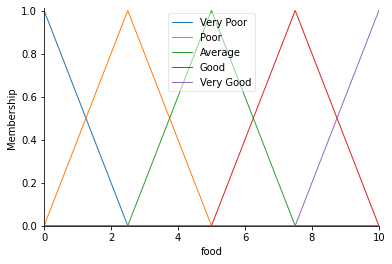

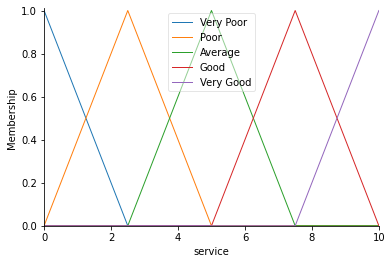

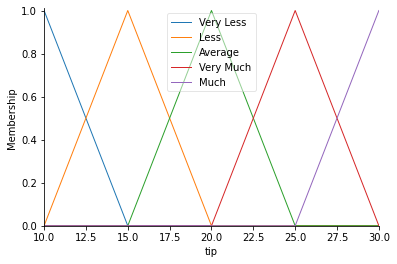

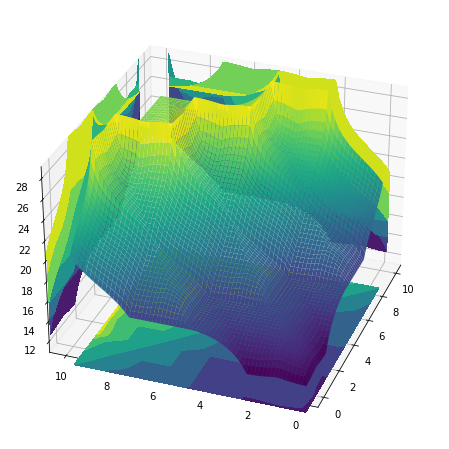

In [28]:
from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from mpl_toolkits.mplot3d import axis3d
import matplotlib.pyplot as plt

universe = np.linspace(0, 10, 61)     
universe1 = np.linspace(10, 30, 61)
food = ctrl.Antecedent(universe, 'food')
service = ctrl.Antecedent(universe, 'service')
tip = ctrl.Consequent(universe1, 'tip')
names = ['Very Poor', 'Poor', 'Average', 'Good', 'Very Good']     ### so phan tu la so le
names_tip = ['Very Less', 'Less', 'Average', 'Very Much', 'Much'] ### ===
food.automf(names = names)
service.automf(names = names)
tip.automf(names = names_tip)
food.view()
service.view()
tip.view()

rule0 = ctrl.Rule(antecedent = ((food['Very Poor'] & service['Very Poor'])| 
                                (food['Poor'] & service['Very Poor'])| 
                                (food['Very Poor'] & service['Poor'])), 
                                consequent = tip['Very Less'], label = 'Rule Very Poor')
###----------------------------------------------------------------------------------------###
rule1 = ctrl.Rule(antecedent = ((food['Very Poor'] & service['Average'])|
                                (food['Very Poor'] & service['Good'])|
                                (food['Good'] & service['Very Poor'])| 
                                (food['Poor'] & service['Poor'])| 
                                (food['Poor'] & service['Average'])|
                                (food['Average'] & service['Very Poor'])|
                                (food['Average'] & service['Poor'])), 
                                consequent = tip['Less'], label = 'Rule Poor')
###----------------------------------------------------------------------------------------###
rule2 = ctrl.Rule(antecedent = ((food['Very Poor'] & service['Very Good'])| 
                                (food['Poor'] & service['Good'])| 
                                (food['Average'] & service['Average'])|
                                (food['Good'] & service['Poor'])|
                                (food['Very Good'] & service['Very Poor'])), 
                                consequent = tip['Average'], label = 'Rule Average')
###----------------------------------------------------------------------------------------###
rule3 = ctrl.Rule(antecedent = ((food['Poor'] & service['Very Good'])| 
                                (food['Average'] & service['Good'])| 
                                (food['Average'] & service['Very Good'])|
                                (food['Good'] & service['Average'])|
                                (food['Good'] & service['Good'])|
                                (food['Very Good'] & service['Poor'])|
                                (food['Very Good'] & service['Average'])), 
                                consequent = tip['Much'], label = 'Rule Much')
###----------------------------------------------------------------------------------------###
rule4 = ctrl.Rule(antecedent = ((food['Good'] & service['Very Good'])| 
                                (food['Very Good'] & service['Good'])| 
                                (food['Very Good'] & service['Very Good'])), 
                                consequent = tip['Very Much'], label = 'Rule Very Good')
     

system = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61 * 61 + 1)
upsampled = np.linspace(0, 10, 61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i, j]
    sim.input['service'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30, 200)




                                
                  


<ipython-input-27-473bd6cb3765>:75: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-27-473bd6cb3765>:76: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-27-473bd6cb3765>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


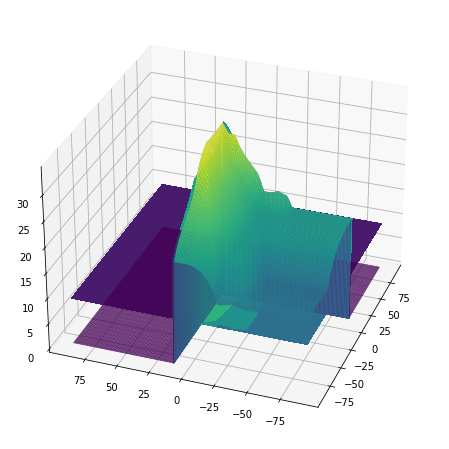

In [27]:
#----------------------Pendulum
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

alpha = np.linspace(-90, 90, 180)
alpha1 = np.linspace(-45, 45, 90)
force = np.linspace(10, 50, 100)
alpha = ctrl.Antecedent(alpha, 'alpha')
alpha1 = ctrl.Antecedent(alpha1, 'alpha1')
force = ctrl.Consequent(force, 'force')
names = ['LN', 'N', 'Zero', 'P', 'LP']
names_force = ['Very Less', 'Less', 'Average', 'Much', 'Very Much']
alpha.automf(names = names)
alpha1.automf(names = names)
force.automf(names = names_force)

rule1 = ctrl.Rule(antecedent = ((alpha['LN'] & alpha1['LN'])| 
                                (alpha['N'] & alpha1['LN'])| 
                                (alpha['LN'] & alpha1['N'])), 
                                consequent = force['Very Less'], label = 'Rule LN')
###-----------------------------------------------------------------------------------###
rule2 = ctrl.Rule(antecedent = ((alpha['LN'] & alpha1['Zero'])|
                                (alpha['LN'] & alpha1['P'])|
                                (alpha['P'] & alpha1['LN'])| 
                                (alpha['N'] & alpha1['N'])| 
                                (alpha['Zero'] & alpha1['LN'])|
                                
                                (alpha['Zero'] & alpha1['N'])), 
                                consequent = force['Less'], label = 'Rule N')
###-----------------------------------------------------------------------------------###
rule3 = ctrl.Rule(antecedent = ((alpha['LN'] & alpha1['LP'])| 
                                (alpha['N'] & alpha1['P'])| 
                                (alpha['Zero'] & alpha1['Zero'])|
                                (alpha['P'] & alpha1['N'])|
                                
                                (alpha['N'] & alpha1['Zero'])|
                                
                                (alpha['LP'] & alpha1['LN'])), 
                                consequent = force['Average'], label = 'Rule Zero')
###-----------------------------------------------------------------------------------###
rule4 = ctrl.Rule(antecedent = ((alpha['N'] & alpha1['LP'])| 
                                (alpha['Zero'] & alpha1['P'])| 
                                (alpha['Zero'] & alpha1['LP'])|
                                (alpha['P'] & alpha1['Zero'])|
                                (alpha['P'] & alpha1['P'])|
                                (alpha['LP'] & alpha1['N'])|
                                (alpha['LP'] & alpha1['Zero'])), 
                                consequent = force['Much'], label = 'Rule P')
###-----------------------------------------------------------------------------------###
rule5 = ctrl.Rule(antecedent = ((alpha['P'] & alpha1['LP'])| 
                                (alpha['LP'] & alpha1['P'])| 
                                (alpha['LP'] & alpha1['LP'])), 
                                consequent = force['Very Much'], label = 'Rule LP')

system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 100 * 100 + 1)
upsampled = np.linspace(-90, 90, 180)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(100):
  for j in range(100):
    sim.input['alpha'] = x[i, j]
    sim.input['alpha1'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['force']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.5, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30, 200)
